---

### Bibliography:

**ICY Readings**

Alsudais, Abdulkareem. 2021. “Incorrect Data in the Widely Used Inside Airbnb Dataset.” Decision Support Systems 141:113453. https://doi.org/10.1016/j.dss.2020.113453.

Guttentag, Daniel A., and Stephen L. J. Smith. 2017. “Assessing Airbnb as a Disruptive Innovation Relative to Hotels: Substitution and Comparative Performance Expectations.” International Journal of Hospitality Management 64:1–10. https://doi.org/10.1016/j.ijhm.2017.02.003.

*Brockes, E. 2023. “Airbnb was wild, disruptive and cheap: we loved it. But it wasn’t a love strong enough to last.” The Guardian. https://www.theguardian.com/commentisfree/2023/mar/08/airbnb-wild-disruptive-cheap-lettings-agency.

Guttentag, Daniel A., and Stephen L. J. Smith. 2017. “Assessing Airbnb as a Disruptive Innovation Relative to Hotels: Substitution and Comparative Performance Expectations.” International Journal of Hospitality Management 64:1–10. https://doi.org/10.1016/j.ijhm.2017.02.003.

**NADIA Readings**

Cheng, M., and X. Jin. 2018. “What Do Airbnb Users Care about? An Analysis of Online Review Comment.” International Journal of Hospitality Management, 76 (A):58–70. https://doi.org/10.1016/j.ijhm.2018.04.004.

*Harris, J. 2018. “Profiteers Make a Killing on Airbnb - and Erode Communities.” The Guardian. https://www.theguardian.com/commentisfree/2018/feb/12/profiteers-killing-airbnb-erode-communities.

Wachsmuth, D., and A. Weisler. 2018. “Airbnb and the Rent Gap: Gentrification Through the Sharing Economy.” Environment and Planning A: Economy and Space 50 (6):1147–70. https://doi.org/10.1177/0308518X18778038.

**EMILY Readings**

Ferreri, Mara, and Romola Sanyal. 2018. “Platform Economies and Urban Planning: Airbnb and Regulated Deregulation in London.” Urban Studies 55 (15):3353–68. https://doi.org/10.1177/0042098017751982.

Horn, K., and M. Merante. 2017. “Is Home Sharing Driving up Rents? Evidence from Airbnb in Boston.” Journal of Housing Economics 38:14–24. https://doi.org/10.1016/j.jhe.2017.08.002.

Quattrone, Giovanni, Davide Proserpio, Daniele Quercia, Licia Capra, and Mirco Musolesi. 2016. “Who Benefits from the ‘Sharing’ Economy of Airbnb?” In Proceedings of the 25th International Conference on World Wide Web, 1385–94. WWW ’16. Republic; Canton of Geneva, CHE: International World Wide Web Conferences Steering Committee. https://doi.org/10.1145/2872427.2874815.

**TABATA Readings**

Eugenio-Martin, J. L., J. M. Cazorla-Artiles, and C. Gonzàlez-Martel. 2019. “On the Determinants of Airbnb Location and Its Spatial Distribution.” Tourism Economics 25 (8):1224–24. https://doi.org/10.1177/1354816618825415.

Gurran, N., and P. Phibbs. 2017. “When Tourists Move in: How Should Urban Planners Respond to Airbnb?” Journal of the American Planning Association 83 (1):80–92. https://doi.org/10.1080/01944363.2016.1249011.

Lee, D. 2016. “How Airbnb Short-Term Rentals Exacerbate Los Angeles’s Affordable Housing Crisis: Analysis and Policy Recommendations.” Harvard Law & Policy Review 10 (1):229–54. https://doi.org/https://heinonline.org/HOL/Page?handle=hein.journals/harlpolrv10&div=13&g_sent=1.

**EMELLIA Readings**

Gutiérrez, J., J. C. Garcı́a-Palomares, G. Romanillos, and M. H. Salas-Olmedo. 2017. “The Eruption of Airbnb in Tourist Cities: Comparing Spatial Patterns of Hotels and Peer-to-Peer Accommodation in Barcelona.” Tourism Management 62:278–91. https://doi.org/10.1016/j.tourman.2017.05.003.

*Minton, A. 2023. “New York is breaking free of Airbnb’s clutches. This is how the rest of the world can follow suit.” The Guardian. https://www.theguardian.com/commentisfree/2023/sep/27/new-york-airbnb-renters-cities-law-ban-properties.

Shabrina, Z., E. Arcaute, and M. Batty. 2019. “Airbnb’s Disruption of the Housing Structure in London.” ArXiv Prepring. University College London. https://arxiv.org/pdf/1903.11205.pdf.

**Collective Readings**

Wachsmuth, D., D. Chaney, D. Kerrigan, A. Shillolo, and R. Basalaev-Binder. 2018. “The High Cost of Short-Term Rentals in New York City.” McGill University. https://www.mcgill.ca/newsroom/files/newsroom/channels/attach/airbnb-report.pdf.


---

#### **PART 01 Data Loading:**

**Step 01:** Openning file called data

In [2]:
import os
import urllib.request
import pandas as pd
import geopandas as gpd

def ensure_data_folder():
    if not os.path.isdir("data"):
        os.makedirs("data")
        print("Created folder: data/")
    else:
        print("Folder already exists: data/")
    print("--" * 30)

ensure_data_folder()

def download_if_missing(url, local_name):
    dest = os.path.join("data", local_name)
    
    print(f" let me check: {local_name}")

    if os.path.isfile(dest):
        size = round(os.path.getsize(dest) / 1024 / 1024, 2)
        print(f"File already exists ({size} MB) — skipping download.")
    else:
        print(f"Downloading from:\n     {url}")
        urllib.request.urlretrieve(url, dest)

        size = round(os.path.getsize(dest) / 1024 / 1024, 2)
        print(f"Download complete — saved {size} MB")

    print("--" * 80)
    return dest

Folder already exists: data/
------------------------------------------------------------


**Step 02:** Downlload Links from Online 

In [3]:
base = "https://orca.casa.ucl.ac.uk/~jreades/data/"

orca_files = [
    "20250615-London-listings.csv.gz",
    "MSOA-2011.gpkg"
]

extra_files = {
    "housing_msoa.csv":
        "https://data.london.gov.uk/download/2z0yn/20264159-36cb-4aa2-8371-ae884ae83e88/msoa-data.csv",

    "local-authority-rents-borough.xlsx":
        "https://data.london.gov.uk/download/2g1k1/2a74e893-3188-4cb8-b5a7-087a1965b623/local-authority-rents-borough.xlsx",

    "london_boroughs.zip":
        "https://data.london.gov.uk/download/20od9/08d31995-dd27-423c-a987-57fe8e952990/London-wards-2018.zip"
}

local_paths = []

print("!STARTING ORCA DOWNLOADS!")

for fname in orca_files:
    url = base + fname
    path = download_if_missing(url, fname)
    local_paths.append(path)

print("!STARTING DATASTORE DOWNLOADS!")

for local_name, url in extra_files.items():
    path = download_if_missing(url, local_name)
    local_paths.append(path)


!STARTING ORCA DOWNLOADS!
 let me check: 20250615-London-listings.csv.gz
File already exists (48.64 MB) — skipping download.
----------------------------------------------------------------------------------------------------------------------------------------------------------------
 let me check: MSOA-2011.gpkg
File already exists (1.69 MB) — skipping download.
----------------------------------------------------------------------------------------------------------------------------------------------------------------
!STARTING DATASTORE DOWNLOADS!
 let me check: housing_msoa.csv
File already exists (0.87 MB) — skipping download.
----------------------------------------------------------------------------------------------------------------------------------------------------------------
 let me check: local-authority-rents-borough.xlsx
File already exists (0.04 MB) — skipping download.
------------------------------------------------------------------------------------------------

**Step 03:** Converting file to CSV

In [4]:
print("!CONVERTING EXCEL (SECOND SHEET) TO CSV!")

excel_path = "data/local-authority-rents-borough.xlsx"
csv_path   = "data/local-authority-rents-borough.csv"

if os.path.isfile(csv_path):
    print(f"CSV already exists, im going to skip conversion: {csv_path}")
else:
    if not os.path.isfile(excel_path):
        print(f"Excel file not found: {excel_path}")
    else:
        rents_xlsx = pd.read_excel(
            excel_path,
            sheet_name="Local Authority Rents"
        )
        rents_xlsx.to_csv(csv_path, index=False)
        print(f"Converted Excel → CSV: {csv_path}")

print("--" * 30)

!CONVERTING EXCEL (SECOND SHEET) TO CSV!
CSV already exists, im going to skip conversion: data/local-authority-rents-borough.csv
------------------------------------------------------------


**Step 04:** Unziping File to Desktop

In [5]:
import zipfile

with zipfile.ZipFile("data/london_boroughs.zip", "r") as zip_ref:
    zip_ref.extractall("data/")
print("Unzipped london_boroughs.zip")

Unzipped london_boroughs.zip


**Step 05:** Filtered Columns 

In [6]:
cols_listings = ['id', 'listing_url', 'last_scraped', 'name', 
    'description', 'host_id', 'host_since',  'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count', 'neighbourhood_cleansed', 
    'latitude', 'longitude', 'price', 
    'property_type', 'room_type', 'accommodates', 
    'price', 'minimum_nights', 'maximum_nights', 
    'minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
    'availability_365', 'number_of_reviews', 
    'first_review', 'last_review', 'review_scores_rating', 
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month']

# Example – you'll adjust after checking dwelling.columns and rents.columns
cols_housing = ["Middle Super Output Area",
                 "MSOA Name",
                 "Households (2011);All Households;"
                 ]

cols_rent = ["Code",
              "New Code",
              "Area",
              "2023-24"
             ]

**Step 05:** Reading the file into pandas and geopandas according to filter columns

In [7]:
print("!LOADING FILES (SELECTED COLUMNS ONLY)!")

# Listings CSV.GZ with selected columns
listings = pd.read_csv(
    "data/20250615-London-listings.csv.gz",
    compression="gzip",
    usecols=cols_listings,
    encoding="latin1",
    low_memory=False
)
print(f"Step 01: listings loaded: {listings.shape[0]:,} rows, {listings.shape[1]} columns")


# MSOA (you usually need all columns)
msoa = gpd.read_file("data/MSOA-2011.gpkg")
print(f"Step 02: msoa loaded: {msoa.shape[0]:,} polygons, {msoa.shape[1]} columns")


# Rent (CSV converted from Excel)
rent = pd.read_csv(
    "data/local-authority-rents-borough.csv",
    usecols=cols_rent,
    encoding="latin1",
    low_memory=False
)
print(f"Step 03: rent loaded: {rent.shape[0]:,} rows, {rent.shape[1]} columns")


# Dwelling (CSV)
housing = pd.read_csv(
    "data/housing_msoa.csv",
    usecols=cols_housing,    
    encoding="latin1",
    low_memory=False
)
print(f"Step 04: housing loaded: {housing.shape[0]:,} rows, {housing.shape[1]} columns")


# Borough boundary polygons
borough = gpd.read_file("data/London-wards-2018_ESRI/London_Ward.shp")
print(f"Step 05: borough loaded: {borough.shape[0]:,} polygons, {borough.shape[1]} columns")


print("**All selected files successfully loaded.**")


!LOADING FILES (SELECTED COLUMNS ONLY)!
Step 01: listings loaded: 96,651 rows, 35 columns
Step 02: msoa loaded: 983 polygons, 13 columns
Step 03: rent loaded: 46 rows, 4 columns
Step 04: housing loaded: 984 rows, 3 columns
Step 05: borough loaded: 657 polygons, 7 columns
**All selected files successfully loaded.**


**PART 02 Data Cleaning:**

**Step 2.0:** Clean Data Frame generically on all the data

In [8]:
def clean_names(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^\w]", "", regex=True)
    )
    return df

# put all your loaded dataframes into a dict
dfs = {
    "listings": listings,
    "msoa": msoa,
    "rent": rent,
    "housing": housing,
    "borough": borough
}

# clean each dataframe
for file, frame in dfs.items():
    dfs[file] = clean_names(frame)
    print(f" cleaned column names for: {file}")

# extract back if you want individual variables
listings  = dfs["listings"]
msoa      = dfs["msoa"]
rent     = dfs["rent"]
housing  = dfs["housing"]
borough   = dfs["borough"]

 cleaned column names for: listings
 cleaned column names for: msoa
 cleaned column names for: rent
 cleaned column names for: housing
 cleaned column names for: borough


---

**Step 2.0:** Clean Listings File

**Step 2.1:** Removing rows with >5 NA values

In [9]:
probs = listings.isnull().sum(axis=1)
listings.isnull().sum(axis=1).sort_values(ascending=False).head(10)

4622     8
5155     8
6122     8
5535     8
30641    8
3646     8
24207    7
34580    7
89683    7
34428    7
dtype: int64

In [10]:
print(f"df contains {listings.shape[0]:,} rows.")
cutoff = 5
listings.drop(probs[probs > cutoff].index, inplace=True)
print(f"df contains {listings.shape[0]:,} rows.")

df contains 96,651 rows.
df contains 95,859 rows.


In [11]:
listings.isnull().sum(axis=0).sort_values(ascending=False) 

price                                           33186
last_review                                     24372
review_scores_rating                            24372
first_review                                    24372
reviews_per_month                               24372
description                                      2140
host_is_superhost                                1742
host_total_listings_count                          26
host_since                                         26
host_listings_count                                26
id                                                  0
last_scraped                                        0
listing_url                                         0
property_type                                       0
longitude                                           0
neighbourhood_cleansed                              0
latitude                                            0
host_id                                             0
name                        

**Step 2.2:** Dealing with column types

In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95859 entries, 0 to 96650
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95859 non-null  int64  
 1   listing_url                                   95859 non-null  object 
 2   last_scraped                                  95859 non-null  object 
 3   name                                          95859 non-null  object 
 4   description                                   93719 non-null  object 
 5   host_id                                       95859 non-null  int64  
 6   host_since                                    95833 non-null  object 
 7   host_is_superhost                             94117 non-null  object 
 8   host_listings_count                           95833 non-null  float64
 9   host_total_listings_count                     95833 non-null  floa

In [13]:
# boolean values
bools = ['host_is_superhost']
for b in bools:
    print(f"Converting {b} to boolean")
    listings[b] = listings[b].replace({'f':False, 't':True}).astype('bool')

# categories
cats = ['property_type','room_type']
for c in cats:
    print(f"Converting {c} to categort")
    listings[c] = listings[c].astype('category')

# dates
dates = ['host_since','first_review','last_review']
for d in dates:
    print(f"Converting {d} to date")
    listings[d] = pd.to_datetime(listings[d])

# strings
money = ['price']
for m in money:
    print(f"Converting {m} to float")
    listings[m] = (
        listings[m]
        .astype(str)            # convert to string so .str works
        .str.replace('$', '', regex=False)
        .str.replace(',', '')
        .replace('nan', float('nan'))  # optional: fix 'nan' strings
        .astype(float))

# integers
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates', 'minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i} to integer")
    try:
        listings[i] = listings[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        listings[i] = listings[i].astype('float').astype(pd.UInt16Dtype())


Converting host_is_superhost to boolean
Converting property_type to categort
Converting room_type to categort
Converting host_since to date
Converting first_review to date
Converting last_review to date
Converting price to float
Converting id to integer
Converting host_id to integer
Converting host_listings_count to integer
  - !!!Converting to unsigned 16-bit integer!!!
Converting host_total_listings_count to integer
  - !!!Converting to unsigned 16-bit integer!!!
Converting accommodates to integer
Converting minimum_nights to integer
Converting maximum_nights to integer
Converting availability_365 to integer


In [14]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95859 entries, 0 to 96650
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            95859 non-null  int64         
 1   listing_url                                   95859 non-null  object        
 2   last_scraped                                  95859 non-null  object        
 3   name                                          95859 non-null  object        
 4   description                                   93719 non-null  object        
 5   host_id                                       95859 non-null  int64         
 6   host_since                                    95833 non-null  datetime64[ns]
 7   host_is_superhost                             95859 non-null  bool          
 8   host_listings_count                           95833 non-null  UInt16   

---

**Question 1: Is AIRBNB out of control in London** 

Brief: In this context we need to define to concepts: (1) What do we consider out of control? (2) What are the types of Airbnbs that are out of control? (3) Where is it out of control? is it the same for the whole city?

In this context, we define "out of control" as a situation in which the number of Airbnb short-term rentals in an area becomes large enough to significantly reduce the availability of long term housing, relative to the number of permanent households, and the capacity of the city to provide new housing units.

According to Minton (2023), London has over 81,000 Airbnb listings, more than 50,000 of which are entire homes. This means that approximately one in every 74 homes in London is advertised as a short-term rental, raising concerns about pressure on the long-term housing market.

However, we must define the type of Airbnb that is having an impact on the long term rental market. nder London’s regulatory framework, a property may not be rented more than 90 nights a year as short-term rental without applying for a change of use, from residential to temporary acommodation. 

For this reason, our analysis focuses on entire homes that are available for rent more than 90 days a year **(Full-time short-term rentals)**

To contextualise this issue, it is useful to examine how Airbnb supply has evolved over time. Using the year of the first review as a proxy for the year in which a listing becomes active.

**

Sub-Questions:

- 1.1 What is our Control (define it, the filter we are applying to entire homes and apartments)?
**Already made the subset >90 days, entire homes**

- 1.2 How is the growth tendency in airbnb full-time short-term rentals
**Histogram using first_review as proxy for the listed year**
    
- 1.3 We are defining out of Control as the number of Airbnb short-term rentals according - to location compared to the number of houses/rentals in that area. Also, to evaluate the difference in revenue between these two.
-Where are the Airbnb locations in London according to Area (MSOA)? (density of Airbnb) How many regular houses vs Airbnb houses per Area (MSOA)?

**I think these two are basically the same, I already did this in the map, used % because you can tell facts like 10 out of 100 housing units in XXX Msoa are Airbnb full-time short-term rentals** 


- 1.4 Can we evaluate the price in revenue and compare each category?
Rental Price: Compare the rent of Airbnb vs council/regular houses to see the difference? (OUTOFCONTROL?)
**This question is still to be answered, we have the Local Authority Average Rents data set, actually one of my readings was about the rent gap in the context of gentrification, and i think it could be really usefull! Basically, it explains that the rent gap theory is the difference of what a landlord is making in the moment by renting in the unit, and the potential income it could generate if some investments were made. It is used to see if its woth to invest (not only in a unit but also as a developer to invest in urban regeneration of some area). So, with Airbnb a new rent gap is introduced, as you could make so much more income without doing anything to the apartment or to the area. This creates a economic incentive to shift properties from normal rent to airbnb. In areas where this Airbnb-based rent gap is particularly high, landlords are more likely to convert units into full-time short-term rentals, which can accelerate processes of displacement and gentrification. I'll try to make a more detail summary with quotations to use for this question**



MSOA Areas 2021
Listings 2023
London Reviews + Calendar
Total Number of households
Local Authority Average Rents https://data.london.gov.uk/dataset/local-authority-average-rents-2g1k1
Output:

Define the base point of out of Control
Map location of Airbnb
Graph comparing the number of homes vs Airbnb per area
Issues:

We don't know if an Airbnb is located in a high-rise, which to us is a significant parameter to value.


**Step 1.1:** Create a subset of what we define as full-time short-term rentals

In [15]:
#Subset only with entire home or apartments listed
listings_entirehome = listings[
        (listings["room_type"] == 'Entire home/apt')
].copy()

print(f"From a total of {listings.shape[0]} Airbnb listings, {listings_entirehome.shape[0]}, equivalent to  {((listings_entirehome.shape[0])/(listings.shape[0])*100):.2f}%, are entire housing units")

From a total of 95859 Airbnb listings, 62132, equivalent to  64.82%, are entire housing units


In [16]:
##Subset with entire homes available for more than 90 days in a year
listings_fulltime = listings[
    (listings["availability_365"] >90) &
    (listings["room_type"] == 'Entire home/apt')
].copy()

print(f"From a total of {listings.shape[0]} Airbnb listings, {listings_fulltime.shape[0]}, equivalent to  {((listings_fulltime.shape[0])/(listings.shape[0])*100):.2f}%, are entire housing units available for rent for more than 90 days")

From a total of 95859 Airbnb listings, 32581, equivalent to  33.99%, are entire housing units available for rent for more than 90 days


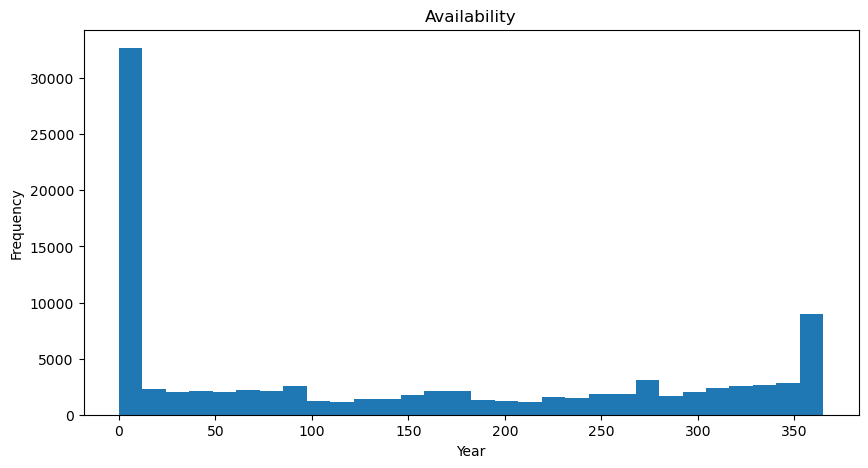

In [17]:
# Just plotted this to check if is worth it to remove the listing that are 0 days available (are almost 30k!!!)
import matplotlib.pyplot as plt

listings["availability_365"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.hist(listings["availability_365"].dropna(), bins=30)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Availability")
plt.show()

In [18]:
len(listings[listings["availability_365"] == 0])

29461

**Step 1.2** Growth tendency in airbnb full-time short-term rentals

The dataset does not include the exact date when a property was first listed on Airbnb. However, it does contain the date of the first review. Because hosts typically receive their first review shortly after a guest stays for the first time, **the year of the first review is generally a good proxy for the year the listing became active.**

For this reason, we use the year of the first review as an estimate of the listing’s “introduction year.” Plotting a histogram of these years allows us to visualize how many new Airbnb listings entered the market each year and to observe the growth of the platform over time.

The histogram shows a clear surge in the number of new listings from 2021 onwards, quickly recovering from the Covid-19 pandemic. The strong growth in recent years suggests that Airbnb supply has been accelerating rather than stabilizing.

In [19]:
#select only the year
listings_fulltime["year_first_review"] = listings_fulltime["first_review"].dt.year

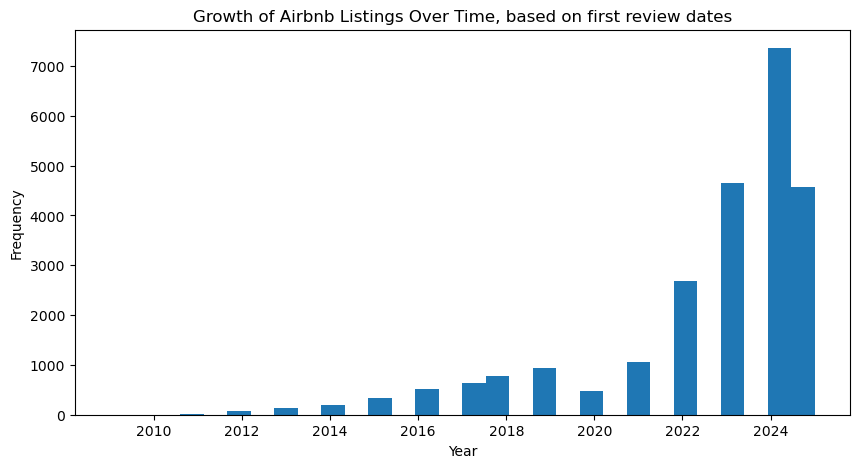

In [20]:
#Plot a histogram 
import matplotlib.pyplot as plt

listings_fulltime["year_first_review"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.hist(listings_fulltime["year_first_review"].dropna(), bins=30)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Growth of Airbnb Listings Over Time, based on first review dates")
plt.show()

**The growth of airbnb vs the growth of london's housing market**

According to the London Plan Annual Monitoring Report 2022–23 (Greater London Authority, 2025), annual housing completions in London have shown relatively limited variation in recent years. Between 2018 and 2023, net housing completions averaged approximately 36,600 homes per year, with fluctuations of only a few thousand units across the period. This contrasts sharply with the rapid growth of Airbnb supply. In 2023, Airbnb added around 5000 new listings, and in 2024 this figure rose to more than 7,200, representing the equivalent of 13.8% to 20% of London’s yearly housing production. These proportions highlight that the rapid expansion of short-term rentals is effectively undermining the impact of London’s efforts to increase housing supply. Even as thousands of new homes are completed each year, a significant share appears to be absorbed into the Airbnb market rather than contributing to long-term housing availability.

**Nadia's comment** 

Here, it would be really interesting to take the housing annual supply of only inner london (which is 14k) and compare it to airbnbs only in inner london (I suppose that about 70/80% of all new listings are located in inner london) so the number will be more important, as you can see how airbnb is cutting the efforts of supplying new housing in the city center (were is more demand). Or we can take a borough from the city center as an example. the report is really good, ill put the link here if anyone want to check it https://www.london.gov.uk/programmes-strategies/planning/implementing-london-plan/monitoring-london-plan , just click on the London Plan Annual Monitoring Report 20 (September 2025) - PDF, 3.29 MB link) 


**Step 1.3** Airbnb Full-time short-term rentals according to location compared to the number of houses/rentals in that area.



In [21]:
#merge the MSOA geometry from the GeoPackage with the household data so that each polygon includes the number of households in that area.
msoa_merged = msoa.merge(housing, left_on="msoa11nm", right_on="msoa_name")
msoa_merged = msoa_merged[["msoa_name", "households_2011all_households", "geometry"]]
msoa_merged = msoa_merged.to_crs(epsg=27700)

In [22]:
#Convert listings fulltime df into Geopandas
import geopandas as gpd

listings_fulltime = gpd.GeoDataFrame(
    listings_fulltime,
    geometry=gpd.points_from_xy(
        listings_fulltime.longitude,
        listings_fulltime.latitude
    ),
    crs="EPSG:4326"    
)

In [23]:
#Reproject to Britain National Grid
listings_fulltime = listings_fulltime.to_crs(epsg=27700)

In [24]:
# Spatial join of the listing according to Msoa and create a group count value for each msoa
listings_sjoin = gpd.sjoin(
    listings_fulltime,
    msoa_merged,
    how="left",
    predicate="within"
)

listing_counts = listings_sjoin.groupby("msoa_name").size()


In [25]:
#  Merge the listing_count values (by MSOA) into the MSOA GeoDataFrame
msoa_merged = msoa_merged.merge(
    listing_counts.reset_index(name="listing_count"),
    on="msoa_name",
    how="left"
)

<Axes: >

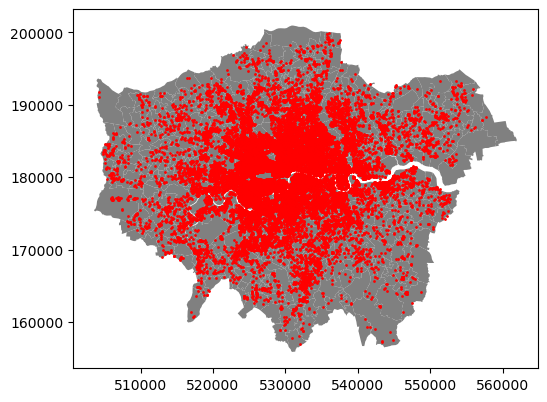

In [26]:
ax = msoa_merged.plot(figsize=(6,6),color="grey")
listings_fulltime.plot(ax=ax, color="red", markersize=1)

In [27]:
# Calculate the percentage of Airbnb listings relative to households per MSOA
msoa_merged["percentage"] = (msoa_merged["listing_count"] / msoa_merged["households_2011all_households"]*100)

<Axes: >

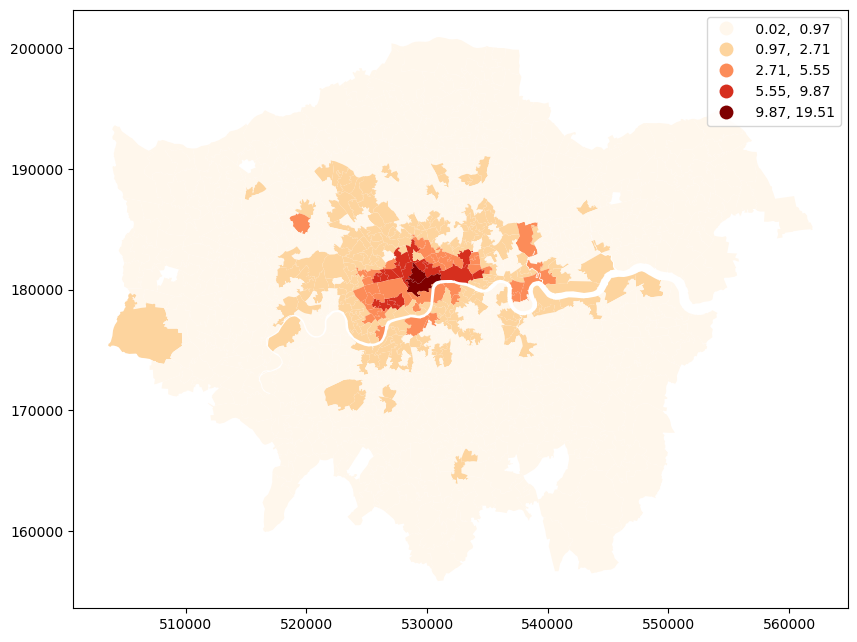

In [28]:
#Plot map ( I use natural breaks so the difference would be more clear, if you take it out it would become a very flat map)
msoa_merged.plot(
    column="percentage",
    cmap="OrRd",     
    scheme="NaturalBreaks",
    legend=True,
    figsize=(10, 8)
)

**Notes**
We may need to add a couple of disclaimers here: 
-the Households data is from 2011.
-The concentration in the values of the city center (City of London, soho, etc) are really high because the MSOAS from the center have really few homes. We should mention that high percentages in this areas reflect low residential population, not necessarily a really high number of airbnbs.

**Conclusions from the map**
The map reveals a highly asymmetric spatial distribution of full time Airbnb Activity in London. Central London show extremly high percentages, in many cases 10 out of 100 homes are full time acomoddations. In contras, most MSOAs in Outer London, show minimun levels of full time Airbnb Activity. This suggests that Airbnb is not "out of control" everywhere, but is concentrated in central, high demand areas.
**(This parragraph needs more work)**


In [29]:
#####################################################################################################

**Question 2: How many professional landlords are there?** 

First we define what a professional lanlord is base on three assumptions:

- A professional landlord rents entire homes or apartments.
- A professional landlord owns listings with a high availability per year.
- A professional landlord owns more that 1 listings, since managing 2 or more listings requires time and coordination, which makes it unlikely for this to be just a "side-job".

The filter has already been done for question 1, so in this section we are going to filter multi-listers hosts and label them as **professional landlords**. This would help us calculate the total reveneu each one of this hosts gain over a year. These numbers would help us see the distribution of the revenue per professional landlord and determinate wheter they are a single person or commercial operators.

**WORKFLOW**

1. Count the values from **listings fulltime** and identify total of professional hosts.
2. Calculate the amount of revenue per listing in a year
3. Calculate the amount of revenue per host in one year.
4. Plot the spatial distribution of the top 6 professional hosts by number of listings.

**NOTE**

I don't know how this could work, but in the last step for this question I am going to see if there is a relationship between professional landlords and the "superhost"(1) label.

(1) From the article "What’s required to be a Superhost" in AirBnb, here are the requirements relevant for the analysis:
- Experienced: At least 10 completed stays (or 3 stays totalling 100+ nights) -> a sign for consistency
- Responsive: Responds quickly to messages (90% response rate) -> a sign for commitment
- To qualify, this criteria are checked every three months

There are 15200 in total, and 3280 are professional landlords


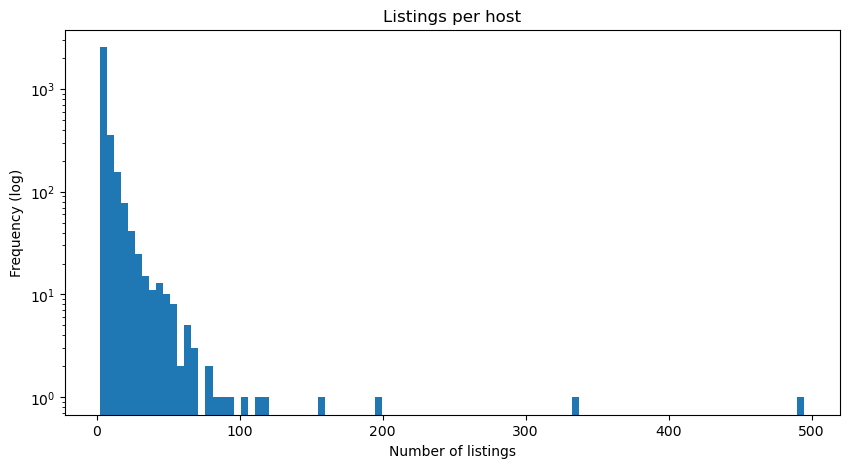

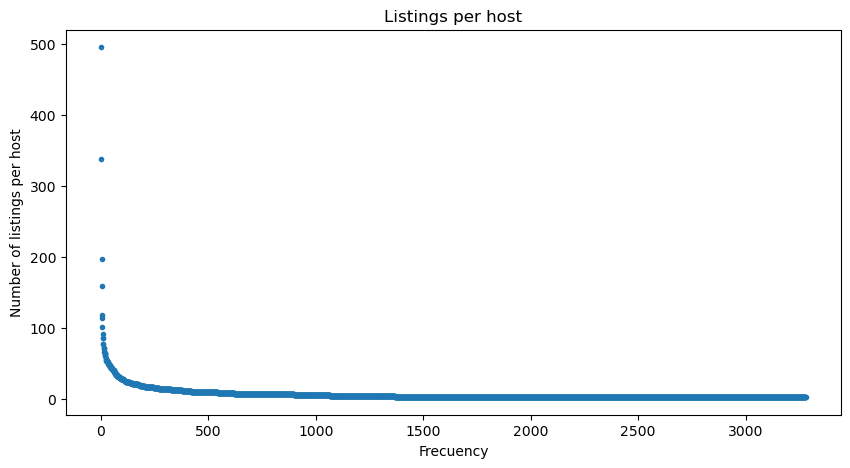

In [70]:
# Step 01 - Identify the total number of professional hosts

# Filter the multi listers from listings with high availabily per year that are entire homes or apartments  
host_counts = listings_fulltime["host_id"].value_counts()
prof_land = host_counts[host_counts > 1]

print(f"There are {host_counts.count()} in total, and {prof_land.count()} are professional landlords")

# OPTION 1: Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(prof_land.values, bins=100)
plt.xlabel("Number of listings")
plt.ylabel("Frequency (log)")
plt.yscale('log') #Using log just to have a better visualization of the data
plt.title("Listings per host")
plt.show()

# OPTION 2: Not sure how you call this
import matplotlib.pyplot as plt

prof_land_plt = prof_land.sort_values(ascending=False).values
plt.figure(figsize=(10,5))
plt.plot(range(1, len(prof_land_plt)+1), prof_land_plt, marker='.', linestyle='none')
plt.xlabel("Frecuency")
plt.ylabel("Number of listings per host")
plt.title("Listings per host")
plt.show()

# ---- Output Data -----
# Total number of professional landlords
# Histogram of the distribution of number of listings per professional lanlord

In [97]:
# Step 02 - Calculate the amount of revenue per listing in a year

################################################
# DISCLAIMER: Here I am using availabilyt_365, but I think Emily's method to calculate availability is better than using this
# This should be explained in the intial scope, also explaining that availability_365 is a number settled by the host,
# it is not real availability
################################################

# Extract the professsional landlord from listings_fulltime
prof_ids = prof_land.index 

# Define de columns to keep
cols_prof = ['id','host_id','price','availability_365', 'host_is_superhost','geometry']

# Make the filter
listings_prof = listings_fulltime.loc[
    listings_fulltime["host_id"].isin(prof_ids),
    cols_prof].copy()

# Add a column with the estimated revenue per listing
listings_prof["estimated_revenue"] = (
    listings_prof["price"] * listings_prof["availability_365"]
)

# Plot
listings_prof

# ---- Output Data -----
# A dataframe with the listings of the professional landlords only and the estimated revenue of each listing per year

,id,host_id,price,availability_365,host_is_superhost,geometry,estimated_revenue
0,264776,1389063,297.0,293,False,POINT (537737.328 173423.242),87021.0
1,264777,1389063,98.0,318,False,POINT (537703.938 173397.858),31164.0
2,264778,1389063,148.0,302,False,POINT (537508.499 173476.041),44696.0
3,264779,1389063,144.0,328,False,POINT (537484.993 173470.956),47232.0
4,264780,1389063,157.0,255,False,POINT (537487.042 173446.529),40035.0
...,...,...,...,...,...,...,...
96642,1439442552777433600,579958059,387.0,264,True,POINT (529895.005 177527.768),102168.0
96643,1439452993689622016,454626788,121.0,243,False,POINT (529359.333 183710.551),29403.0
96647,1439588527887649792,1190865,95.0,361,True,POINT (533504.175 184436.027),34295.0
96648,1439655439747195648,501629235,299.0,359,False,POINT (527205.903 181498.693),107341.0


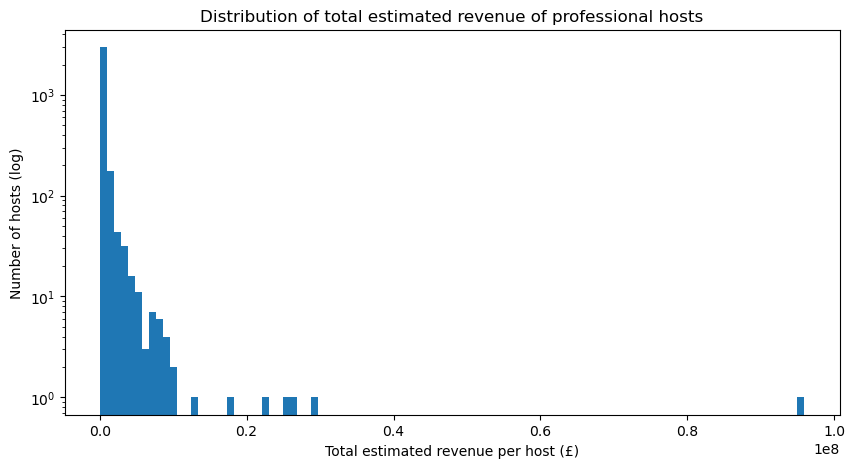

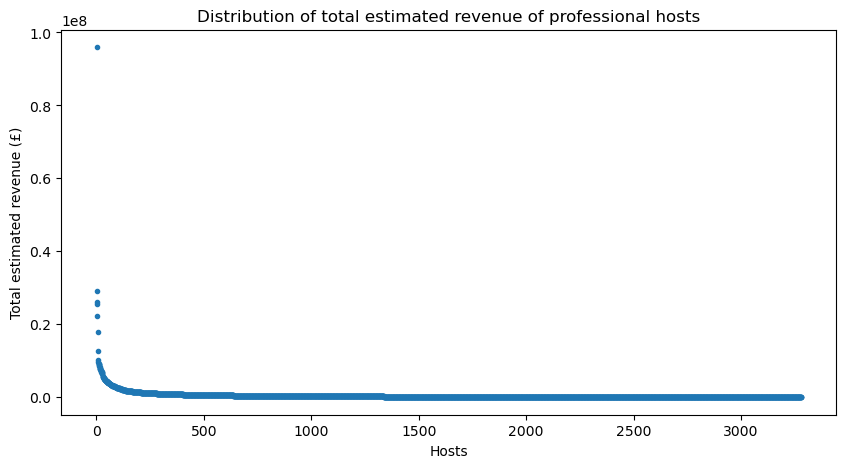

In [102]:
# Step 03: Calculate the amount of revenue per host in one year

# Sum revenue per professional host in pounds £
prof_rev = (listings_prof.groupby("host_id")
    .agg(n_listings=("id", "nunique"),
         is_superhost=("host_is_superhost", "max"),
         total_est_revenue=("estimated_revenue", "sum")
    )
    .reset_index()
    .sort_values(by="total_est_revenue", ascending=False))

# OPTION 1: Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(prof_rev["total_est_revenue"], bins=100)
plt.xlabel("Total estimated revenue per host (£)")
plt.ylabel("Number of hosts (log)")
plt.yscale('log') #Using log just to have a better visualization of the data
plt.title("Distribution of total estimated revenue of professional hosts")
plt.show()

# OPTION 2: Not sure how you call this
import numpy as np

prof_rev_plt = prof_rev.sort_values(by="total_est_revenue", ascending=False)
y = prof_rev_plt["total_est_revenue"].values
x = np.arange(1, len(y) + 1)

plt.figure(figsize=(10,5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("Hosts")
plt.ylabel("Total estimated revenue (£)")
plt.title("Distribution of total estimated revenue of professional hosts")
plt.show()

# ---- Output Data -----
# A histogram of the distributions of the revenues per professional landlord

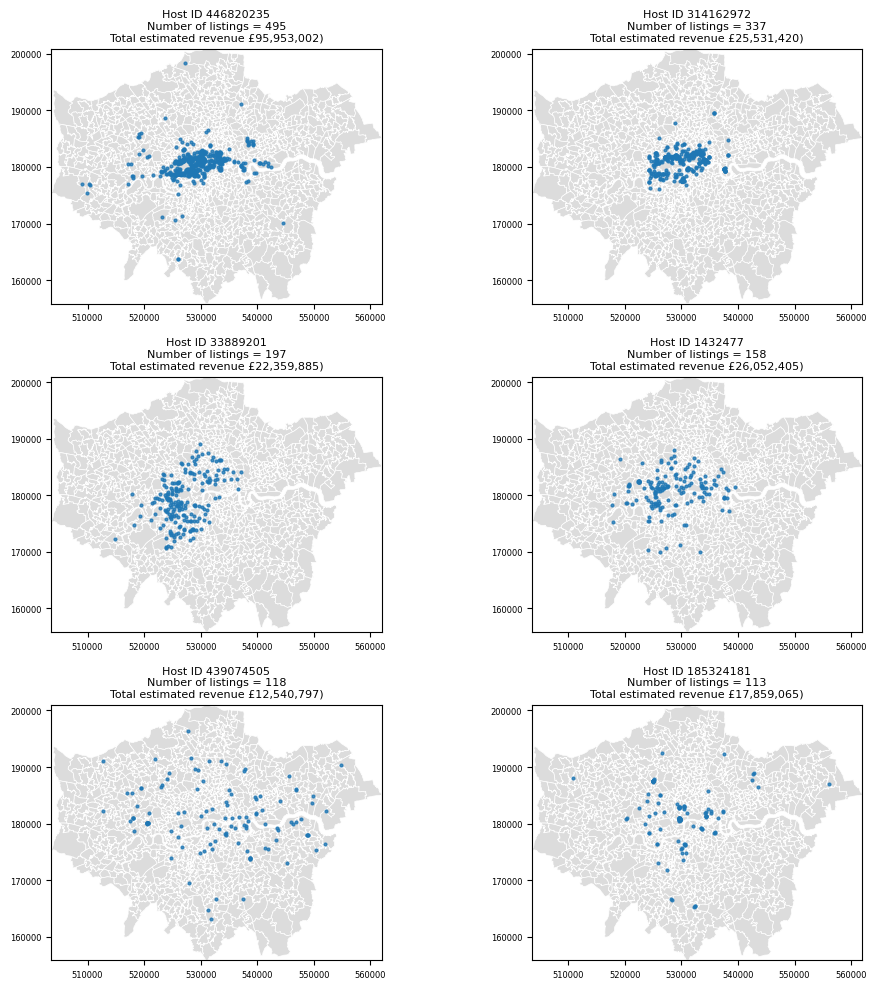

In [103]:
# Step 03: Plot the spatial distribution of the top 6 professional hosts by number of listings.

# Picking the top 6 professional hosts random hosts to plot
# Keep the information about number of listings and total estimated revenue
prof_top6 = (prof_rev
    .set_index("host_id")
    .sort_values(by="n_listings", ascending=False)
    .head(6)                            
)

#Extract the spatial attributes of the top 10 professional hosts
listings_prof6 = listings_prof[listings_prof["host_id"]
    .isin(prof_top6.index)].copy()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# To make sure all the maps share the same frame
xmin, ymin, xmax, ymax = msoa_merged.total_bounds

# Loop for each of the top 6 hosts for subplots
for ax, (host_id, row) in zip(axes.flat, prof_top6.iterrows()):
    n_list = row["n_listings"]
    revenue = row["total_est_revenue"]
    
    # subset listings for this host
    sub = listings_prof6[listings_prof6["host_id"] == host_id]

    # Boundaries for context
    msoa_merged.plot(
        edgecolor="white",
        facecolor="Gainsboro",
        linewidth=0.5,
        ax=ax
    )
    
    # Listings as points for every host
    sub.plot(
        ax=ax,
        markersize=4,
        alpha=0.8,
        legend=False
    )

    ax.set_title(
        f"Host ID {host_id}\n"
        f"Number of listings = {n_list}\n"
        f"Total estimated revenue £{revenue:,.0f})",
        fontsize=8
    )
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.tick_params(axis="both", labelsize=6)

plt.tight_layout()
plt.show()

# ---- Output Data -----
# Spatial distribution of the top 6 professional landlords with the most number of listings
# The plot is showing us that the listings of the top 6 professional landlords are spread across London,
# with some of them being clustered around the central area and in high value boroughs. This sptial distribution,
# plus the portafolio size and total estimated revenue for all the listings, indicates that some of these hosts are
# actually comercial operators and not just individuals sharing their houses as the original porpouse of AirBnb was.

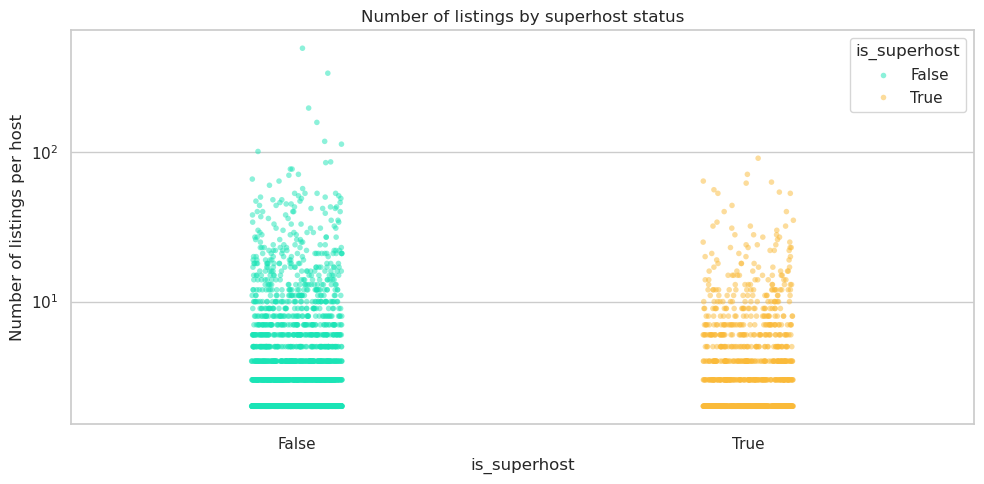

In [130]:
# Step 04: Hopefully this win't work. How many of the total of hosts are considered "superhost"?
# Is there any relationship with the number of listings they have?

# Create a box plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.stripplot(
    data=prof_rev,
    x="is_superhost",      
    y="n_listings",
    hue="is_superhost",
    alpha=0.5,
    size=4,
    palette="turbo"
)

plt.title("Number of listings by superhost status of professional lanlords")
plt.ylabel("Number of listings per host")
plt.yscale("log") #Using log just to have a better visualization of the data

plt.tight_layout()
plt.show()

# Calculate Pearson correlation
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(prof_rev['n_listings'], prof_rev['is_superhost'])

print("Pearson correlation coefficient:", corr_coef)
print("Two-tailed p-value:", p_value)

# ---- Output Data -----
# A boxplot that shows the distribution of the the number of listings under the superhost condition per professional landlord
# As seen in the plot, the "superhost" condition has no relationship with the number of listings per professional landlord, 
# meaning that having a large portafolio does not mean having a higher-quality service and that the number of listings is more driven by 
# a commercial bussines model despite the number of listings.

# ---- Output Data -----
# The pearson correlation coefficient is close to zero and the p´value being less than 0.05 show us that there is not correlation between
# the number of listings and the "superhost" condition and that this result is statistically significant

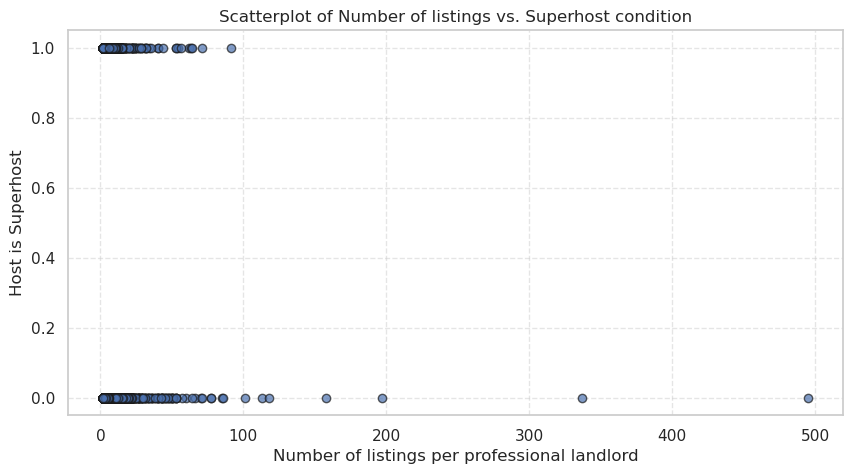

Pearson correlation coefficient: -0.03876379185138876
Two-tailed p-value: 0.026416032132170208


In [118]:
# Scatterplot between number of listings and superhost condition
plt.figure(figsize=(10,5))
plt.scatter(prof_rev['n_listings'], prof_rev['is_superhost'], alpha=0.7, edgecolor='k')
plt.xlabel('Number of listings per professional landlord')
plt.ylabel('Host is Superhost')
plt.title('Scatterplot of Number of listings vs. Superhost condition')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Calculate Pearson correlation
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(prof_rev['n_listings'], prof_rev['is_superhost'])

print("Pearson correlation coefficient:", corr_coef)
print("Two-tailed p-value:", p_value)

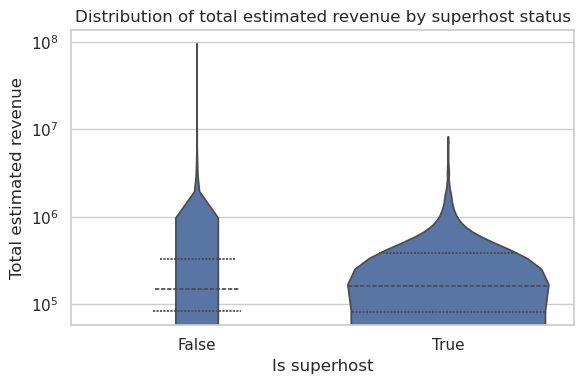

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6,4))
sns.violinplot(
    data=prof_rev,
    x="is_superhost",          # categoría: False / True
    y="total_est_revenue",     # variable continua
    inner="quartile",
    cut=0
)

plt.xlabel("Is superhost")
plt.ylabel("Total estimated revenue")
plt.yscale('log') #Using log just to have a better visualization of the data
plt.title("Distribution of total estimated revenue by superhost status")
plt.tight_layout()
plt.show()


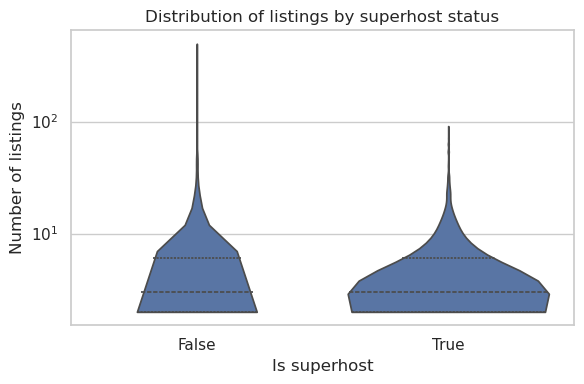

In [116]:
plt.figure(figsize=(6,4))
sns.violinplot(
    data=prof_rev,
    x="is_superhost",
    y="n_listings",
    inner="quartile",
    cut=0
)
plt.xlabel("Is superhost")
plt.ylabel("Number of listings")
plt.yscale('log') #Using log just to have a better visualization of the data
plt.title("Distribution of listings by superhost status")
plt.tight_layout()
plt.show()


In [65]:
# Step 04: Hopefully this win't work. How many of the total of hosts are considered "superhost"?
# Is there any relationship with the number of listings they have?
# Can we assume that the number of listings per hosts is a sign of "quality" of the service provided?

# For Hosts who are Superhosts
super_listings = listings_fulltime[listings_fulltime["host_is_superhost"] == True].copy()

# Multilisters among Superhosts
super_host_counts = super_listings["host_id"].value_counts()
super_host_multi  = super_host_counts[super_host_counts > 1]

print(f"There are {host_counts.count()} in total, and {super_host_multi.count()} of them are superhosts with more than 1 listing")
print(f"There are {super_host_multi.count()} professional landlords")

There are 15200 in total, and 1058 of them are superhosts with more than 1 listing
There are 1058 professional landlords


1. “Professional” is about behaviour, not scale

A host with 2 listings:

rents multiple entire homes

is a Superhost

generates more than casual revenue

Even if the two listings are close to each other, the act of managing multiple properties already signals professionalisation (not a hobby, not a spare room).